In [1]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import median_absolute_error
from sklearn.metrics import PredictionErrorDisplay
from sklearn.neural_network import MLPRegressor

import numpy as np
import scipy as sp

# I coded up mixture_composition_regression.
from mixture_composition_regression.sample import Sample
from mixture_composition_regression.mixture import Mixture
from mixture_composition_regression.import_spectrum import clean_data
from mixture_composition_regression.svr import *


import matplotlib.pyplot as plt
import xarray as xr

In [2]:
preprocessor = get_preprocessor()
m1 = import_training_set()

### Select model, bounds on wavelength

In [103]:
# model = get_pipeline(preprocessor, regr=Ridge(alpha=10**-3)) # alpha determines how much damping there is on 
# model = get_pipeline(preprocessor, regr=RidgeCV(alphas=np.logspace(-20, 20, 21)))
# model = get_pipeline(preprocessor, regr=SVR(gamma='scale', epsilon=0.0001)) 
model = get_pipeline(preprocessor, 
                     regr=MLPRegressor(hidden_layer_sizes=(100,100,100,100),
                                       activation="relu",
                                       random_state=1,
                                       max_iter=2000))
lbounds = [900, 1200]

### Select target variable

In [105]:
y, X = get_Xy(m1, lbounds=lbounds)
# y = y[:, 0]  # regress water
y = y[:, 1]  # regress dipa
# y = y[:, 2]  # regress nacl

As you can see, there is a really high dimensional space available to us. There are options for all kinds of regressors, each with a choice of parameters. We can also choose which part of the spectrum we look at, and which variable we want to regress on.

So far, I have only been trying things manually, more or less shooting in the dark.

This is where your intuition and experience could really come in handy.

What should we try? What is appropriate?

### Run model

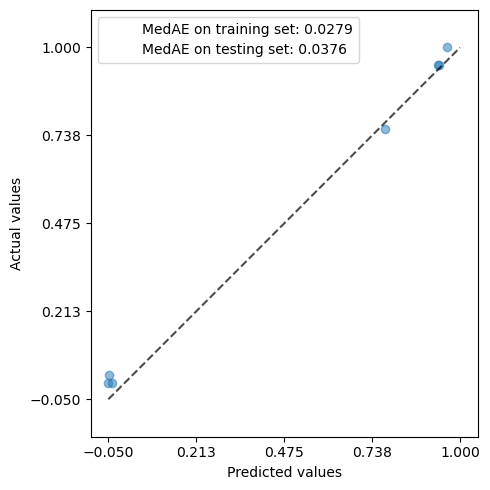

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='Predicted values', ylabel='Actual values'>)

In [112]:
# randomly a random sample of 25% of the spectra and use them as a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


model.fit(X_train, y_train) # train the model using the training data.
y_pred = model.predict(X_test) # use the model to make predictions based on the X_test spectra

mae_train = median_absolute_error(y_train, model.predict(X_train)) # calculate median abs error
mae_test = median_absolute_error(y_test, y_pred)

plot_mae(y_test, y_train, y_pred, mae_test, mae_train) # plot